<a href="https://colab.research.google.com/github/kahumawalter/AirbnbParis/blob/main/Airbnb_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
filename = '/content/drive/MyDrive/Data projects/Airbnb Data/Listings.csv'
df = pd.read_csv(filename, encoding="latin1")
df.head()

<ipython-input-2-fe15a991f5b3>:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, encoding="latin1")


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [3]:
df['host_since'] = pd.to_datetime(df['host_since'])


In [4]:
df['host_location'].value_counts()

Paris, Ile-de-France, France                           47794
New York, New York, United States                      24040
Rome, Lazio, Italy                                     20138
Cape Town, Western Cape, South Africa                  13602
Rio de Janeiro, State of Rio de Janeiro, Brazil        13211
                                                       ...  
Niort, Poitou-Charentes, France                            1
Gloversville, New York, United States                      1
Rangsit, Pathum Thani, Thailand                            1
Ozumba de Alzate, Estado de Mexico, Mexico                 1
BrasÃÂ­lia de Minas, State of Minas Gerais, Brazil        1
Name: host_location, Length: 7159, dtype: int64

In [5]:
# filter where the city is Paris and keep specific columns
paris = df[df['city']== 'Paris'][['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
paris.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [6]:
paris.isna().sum()


host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [7]:
#dropping the missing values
paris_new = paris.dropna()
# describing the minimum, maximum and average for each numeric field
paris_new.describe()

,accommodates,price
count,64657.000000,64657.000000
mean,3.037877,113.104614
std,1.588382,214.479626
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [8]:
 #Creating a table that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

 paris_listings_neighbourhood = paris_new.groupby('neighbourhood')['price'].mean().sort_values().reset_index()
 print(paris_listings_neighbourhood)

          neighbourhood       price
0          Menilmontant   74.911561
1       Buttes-Chaumont   82.690182
2     Buttes-Montmartre   87.222069
3               Reuilly   89.058402
4            Popincourt   90.518955
5              Gobelins   98.110184
6          Observatoire  101.873591
7   Batignolles-Monceau  102.615616
8     Enclos-St-Laurent  102.988752
9             Vaugirard  106.842073
10                Opera  119.050713
11             Pantheon  122.696120
12               Temple  138.429300
13       Hotel-de-Ville  144.515228
14               Bourse  149.496801
15           Luxembourg  155.638639
16       Palais-Bourbon  156.891525
17                Passy  161.190476
18               Louvre  175.379972
19               Elysee  210.536765


In [9]:
# Find the most expensive neighborhood
most_expensive_neighborhood = paris_new.groupby('neighbourhood')['price'].mean().idxmax()


# Filter down to the most expensive neighborhood
expensive_neighborhood_data = paris_new[paris_new['neighbourhood'] == most_expensive_neighborhood]

# Group by 'accommodates' and calculate the mean price for each group
paris_listings_accommodations = expensive_neighborhood_data.groupby('accommodates')['price'].mean().sort_index().reset_index()

# Print or use the grouped data as needed
print(paris_listings_accommodations)


    accommodates       price
0              0    0.000000
1              1   79.522222
2              2  155.103352
3              3  152.828767
4              4  212.096070
5              5  328.817073
6              6  355.508571
7              7  411.538462
8              8  405.518519
9              9  440.272727
10            10  500.857143
11            11  805.000000
12            12  529.625000
13            13  842.500000
14            14  971.000000
15            16  800.000000


In [10]:
#Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and
#count of rows representing the number of new hosts

paris_listings_over_time = paris_new.groupby('host_since')['price'].mean().sort_index().reset_index()

print(paris_listings_over_time)

     host_since   price
0    2008-08-30   63.00
1    2008-09-09  125.00
2    2008-10-14   60.00
3    2009-01-16   89.00
4    2009-02-14   81.00
...         ...     ...
3849 2021-02-03   95.25
3850 2021-02-04   67.00
3851 2021-02-05   48.00
3852 2021-02-06   88.50
3853 2021-02-07   78.00

[3854 rows x 2 columns]


In [11]:
# Extract the year from the 'host_since' column
paris_new['host_since'] = pd.to_datetime(paris_new['host_since']).dt.year

# Group by 'host_since_year' and calculate the average price and count
paris_listings_over_time = paris_new.groupby('host_since').agg({'price': 'mean', 'host_since': 'count'})
paris_listings_over_time = paris_listings_over_time.rename(columns={'price': 'average_price', 'host_since': 'new_hosts_count'}).reset_index()

# Print or use the grouped data as needed
print(paris_listings_over_time)

    host_since  average_price  new_hosts_count
0         2008      77.750000                4
1         2009     159.641509              106
2         2010     125.031250              416
3         2011     124.828230             1339
4         2012     111.578615             4592
5         2013     107.096414             8142
6         2014     100.253800            10922
7         2015     103.646250            12147
8         2016     114.159847             8871
9         2017     108.658888             4585
10        2018     138.209362             4294
11        2019     129.757113             5694
12        2020     141.456038             3412
13        2021      93.488722              133


<ipython-input-11-c1b0a8664756>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_new['host_since'] = pd.to_datetime(paris_new['host_since']).dt.year


In [12]:
paris_listings_over_time.head()

,host_since,average_price,new_hosts_count
0,2008,77.750000,4
1,2009,159.641509,106
2,2010,125.031250,416
3,2011,124.828230,1339
4,2012,111.578615,4592


Text(0.5, 1.0, 'Average Price by Neighbourhood in Paris')

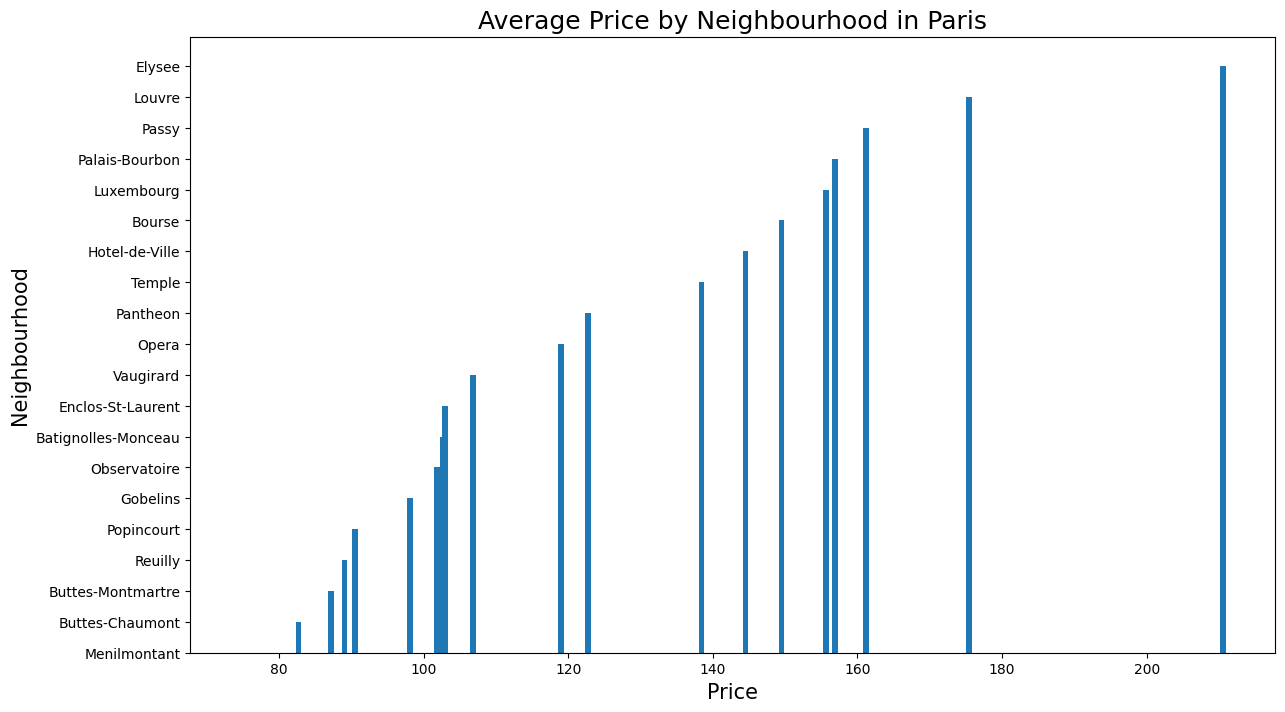

In [13]:
plt.figure(figsize=(14,8))
plt.bar(paris_listings_neighbourhood['price'], paris_listings_neighbourhood['neighbourhood'])
plt.xlabel('Price', fontsize= 15)
plt.ylabel('Neighbourhood', fontsize= 15)
plt.title('Average Price by Neighbourhood in Paris', fontsize=18)


According the graph, the most expensive neighbourhood by average in Paris is Elysee followed by Louvre while the least expensive neighbourhoods are Menilmontant followed by Buttes-Chaumount.

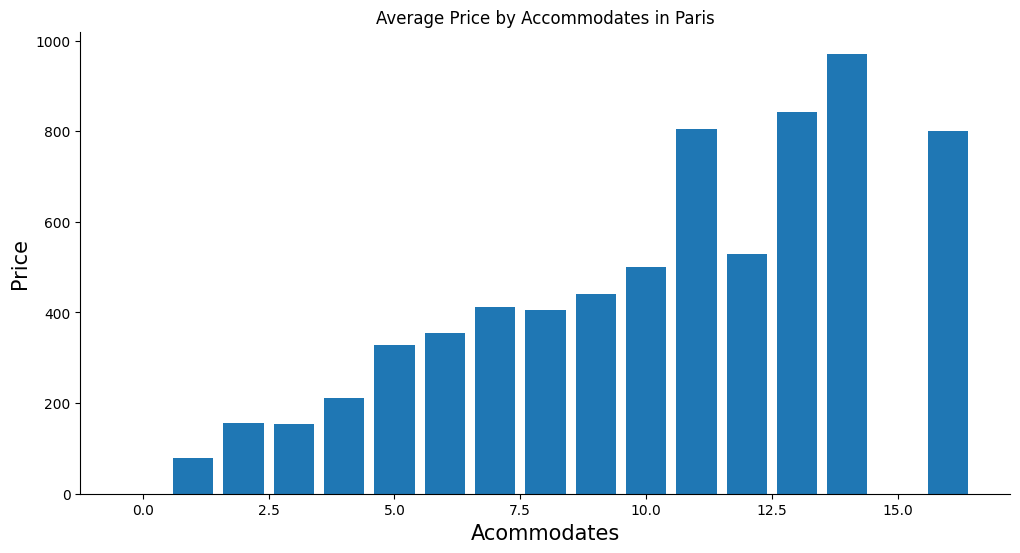

In [43]:
#A horizontal bar chart of the average price by ‘accommodates’ in Paris’
plt.figure(figsize=(12,6))
plt.bar(paris_listings_accommodations['accommodates'],paris_listings_accommodations['price'])
plt.xlabel('Acommodates',fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Average Price by Accommodates in Paris')

# Use sns.despine() to remove the top and right spines
sns.despine()

The bar graph above shows the more an Airbnb is able to accomodate the more the price will be. However, there some situations where an Airbnb can accomodate 12 people but it is priced as the ones which can only accommodates priced as the ones which can only accommodate 10, in these scenarios the neighbourhood plays a role in the pricing.

In [15]:
paris_listings_over_time.value_counts()

host_since  average_price  new_hosts_count
2008        77.750000      4                  1
2009        159.641509     106                1
2010        125.031250     416                1
2011        124.828230     1339               1
2012        111.578615     4592               1
2013        107.096414     8142               1
2014        100.253800     10922              1
2015        103.646250     12147              1
2016        114.159847     8871               1
2017        108.658888     4585               1
2018        138.209362     4294               1
2019        129.757113     5694               1
2020        141.456038     3412               1
2021        93.488722      133                1
dtype: int64

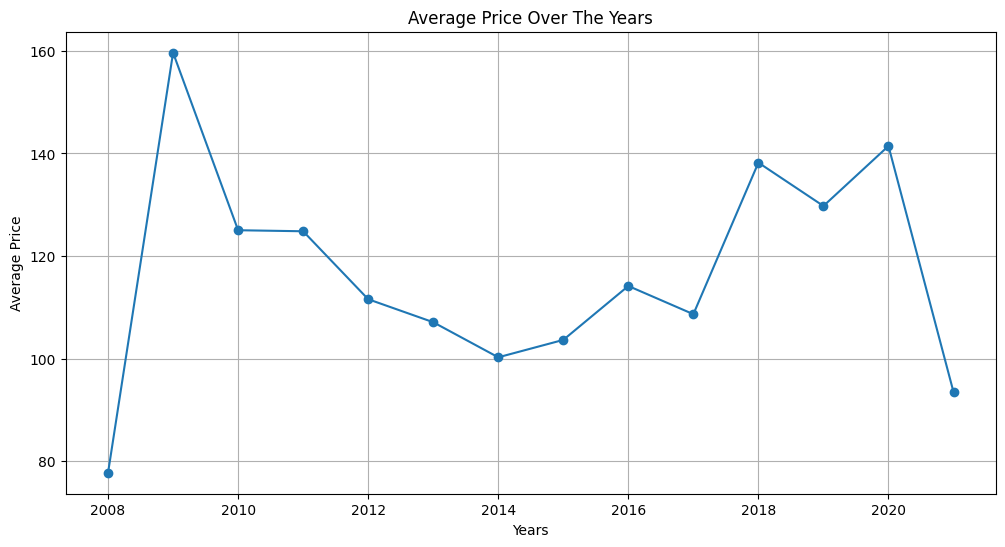

In [41]:
plt.figure(figsize=(12,6))
plt.plot(paris_listings_over_time['host_since'],paris_listings_over_time['average_price'], marker='o', label='Average Price')
plt.ylabel('Average Price')
plt.xlabel('Years')
plt.title('Average Price Over The Years' )
plt.grid()


The line chart above shows that the average price was at 160 in 2009, before it started dropping. In 2021, the average price was at an all-time low at 93 compared to the results of the past 10 years.

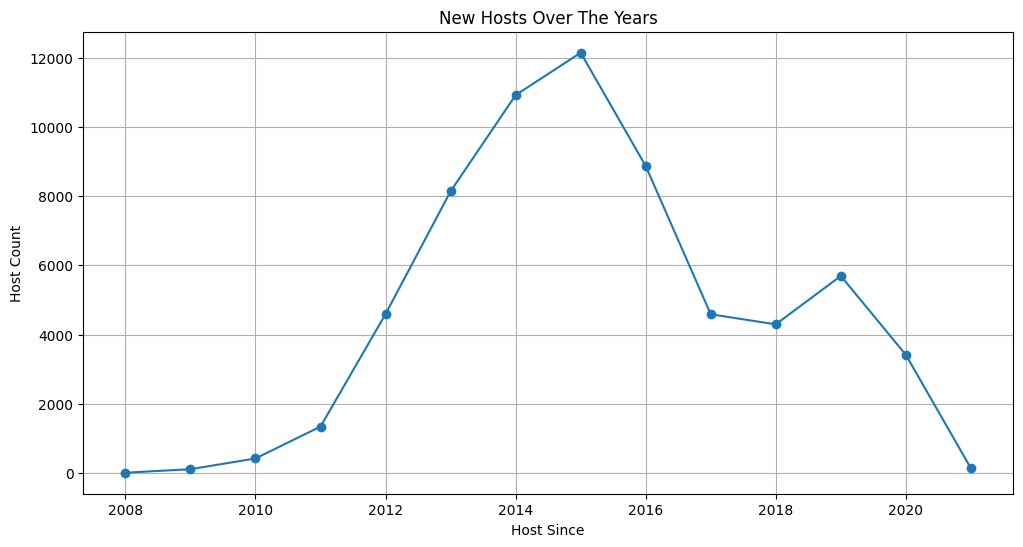

In [44]:
# New Hosts over the years.

plt.figure(figsize=(12,6))
plt.plot(paris_listings_over_time['host_since'],paris_listings_over_time['new_hosts_count'], marker='o', label='Average Price')
plt.ylabel('Host Count')
plt.xlabel('Host Since')
plt.title('New Hosts Over The Years' )
plt.grid()

The line graph shows that the majority of new hosts were in 2015 with about 12,000. However, it has been a downward trend since with then. In 2021, there were no new hosts.

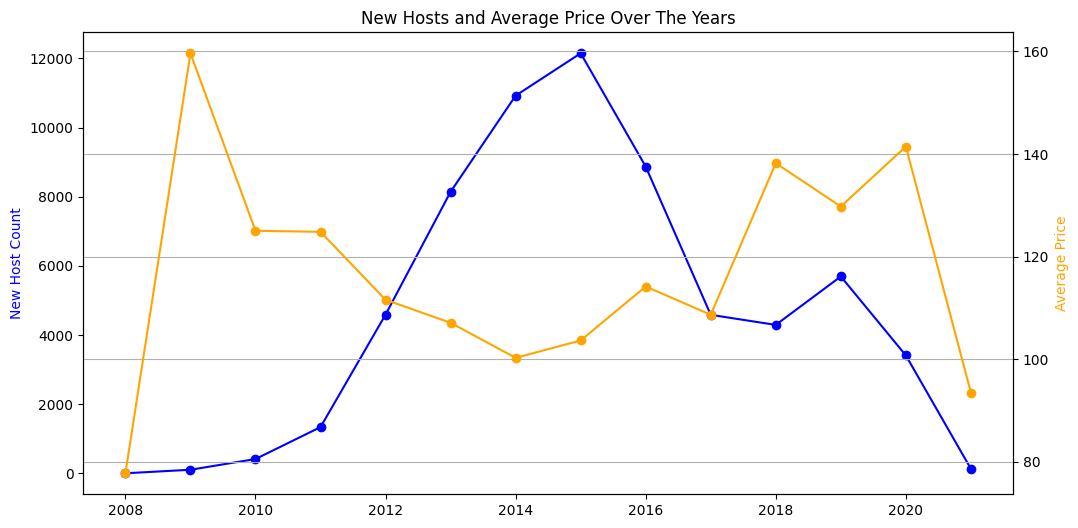

In [48]:
plt.figure(figsize=(12, 6))

# Plotting new host count on the primary y-axis
plt.plot(paris_listings_over_time['host_since'], paris_listings_over_time['new_hosts_count'], marker='o', label='New Host Count', color='blue')
plt.ylabel('New Host Count', color='blue')

# Creating a secondary y-axis for average price
ax2 = plt.gca().twinx()
ax2.plot(paris_listings_over_time['host_since'], paris_listings_over_time['average_price'], marker='o', label='Average Price', color='orange')
ax2.set_ylabel('Average Price', color='orange')

plt.xlabel('Host Since')
plt.title('New Hosts and Average Price Over The Years')
plt.grid()
plt.show()



The graph shows that the highest number of host sign-ups was in 2015 with 160 and after that, the numbers dropped with the least number of signups happening in 2021. The average price of Airbnb in Paris was highest in 2009 at 160 and the lowest in 2021 at roughly 90.